## CoViD-19 

### Analisi a livello regionale

In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib

In [3]:
# Dictionary of situation per each day
# import the csv and append to the dictionary

current_day=20
dataframes={}

# February
for x in range(24, 30):
    globals()['df_feb_%s' % x] = pd.read_csv("data/dati-regioni/dpc-covid19-ita-regioni-202002"+str(x)+".csv")
    dataframes['Feb_%s' %x]=globals()['df_feb_%s' % x] 
    
# March
for x in range(1, 10):
    globals()['df_mar_%s' % x] = pd.read_csv("data/dati-regioni/dpc-covid19-ita-regioni-2020030"+str(x)+".csv")
    dataframes['Mar_%s' %x]=globals()['df_mar_%s' % x] 
for x in range(10, current_day+1):
    globals()['df_mar_%s' % x] = pd.read_csv("data/dati-regioni/dpc-covid19-ita-regioni-202003"+str(x)+".csv")
    dataframes['Mar_%s' %x]=globals()['df_mar_%s' % x] 

In [4]:
# Dizionario abitanti per regione

lista=[0]*21
abitanti = dict(zip(dataframes['Mar_3'].columns, lista))

abitanti['Abruzzo']=1311580
abitanti['Basilicata']=562869
abitanti['P.A. Bolzano']=533050
abitanti['Calabria']=1947131
abitanti['Campania']=5801692
abitanti['Emilia Romagna']=4459477
abitanti['Friuli Venezia Giulia']=1215220
abitanti['Lazio']=5898124
abitanti['Liguria']=1550640
abitanti['Lombardia']=10018806
abitanti['Marche']=1525271
abitanti['Molise']=305617
abitanti['Piemonte']=4356406
abitanti['Puglia']=4029053
abitanti['Sardegna']=1639591
abitanti['Sicilia']=4999891
abitanti['Toscana']=3729641
abitanti['P.A. Trento']=541380 
abitanti['Umbria']=882015
abitanti['Valle d\'Aosta']=125666
abitanti['Veneto']=4905854

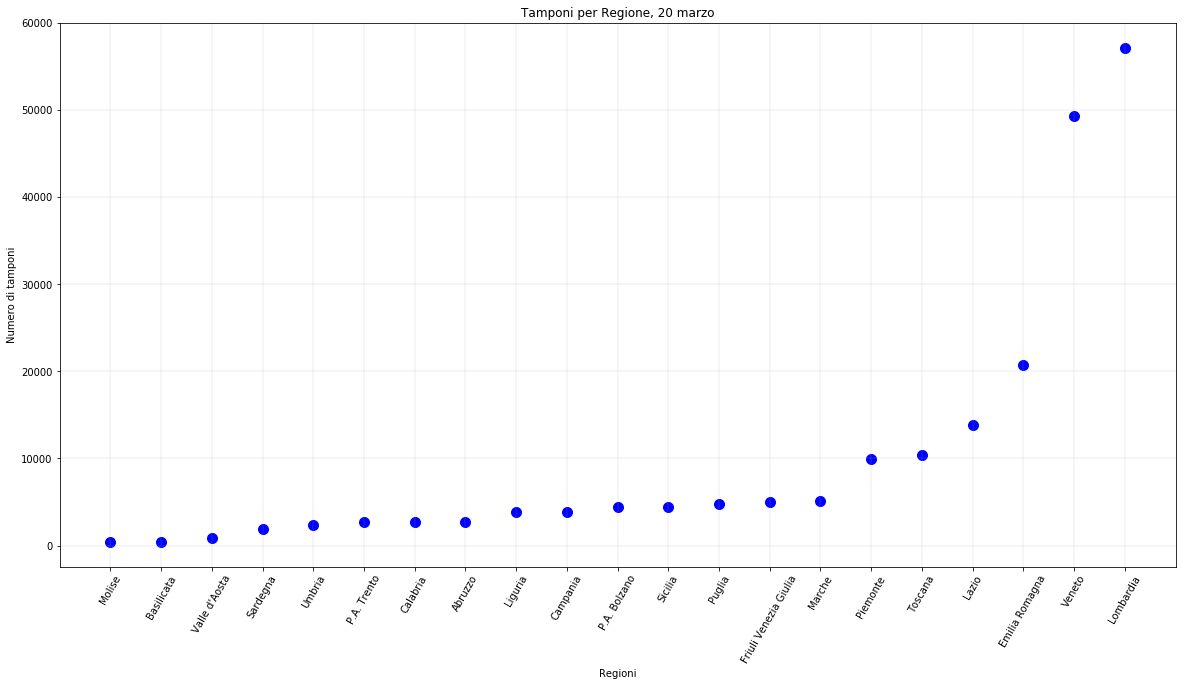

In [5]:
# Grafico tamponi per regione

plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
plt.xlabel('Regioni')
plt.grid(linewidth=0.2)
plt.ylabel('Numero di tamponi')
plt.title('Tamponi per Regione, %s marzo' % current_day)
_=plt.scatter(df_mar_20.sort_values(by='tamponi').denominazione_regione, df_mar_20.sort_values(by='tamponi').tamponi, color="blue",s=100, marker="o")

<BarContainer object of 21 artists>

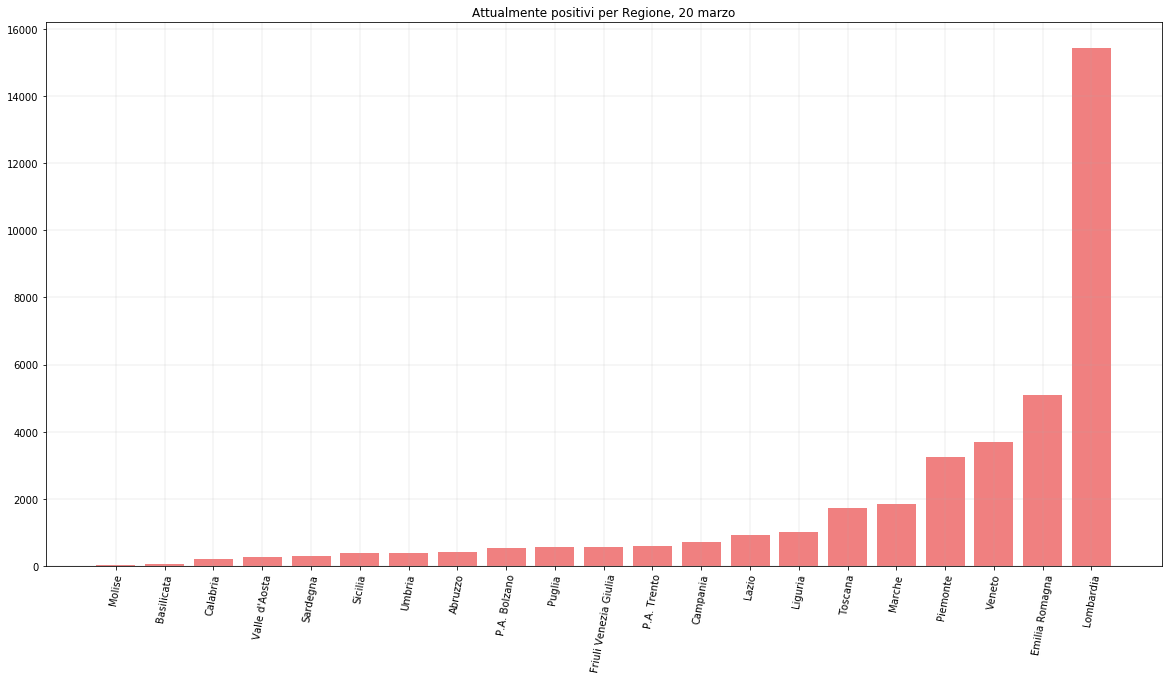

In [7]:
# Grafico positivi per regione
plt.figure(figsize=(20,10))
plt.xticks(rotation=80)
plt.grid(linewidth=0.2)
#plt.xlabel('Regioni')
#plt.ylabel('Numero di attualmente positivi')
plt.title('Attualmente positivi per Regione, %s marzo' %current_day)

plt.bar(df_mar_20.sort_values(by='totale_attualmente_positivi').denominazione_regione, df_mar_20.sort_values(by='totale_attualmente_positivi').totale_attualmente_positivi, color="lightcoral")

In [8]:
# Creazione dataframe che mostra andamento giornaliero della statistica desiderata per ogni regione

def reg_trend(stat_type):
    lista_appoggio=[]
    for el in dataframes:
        lista_appoggio.append(dataframes[el][stat_type])
    df=pd.DataFrame(lista_appoggio)

    df.index=[x for x in dataframes]
    df.rename(inplace=True, columns=dataframes['Feb_24'].denominazione_regione, index=pd.Series([x for x in dataframes]))
    df=pd.DataFrame(df)
    return df

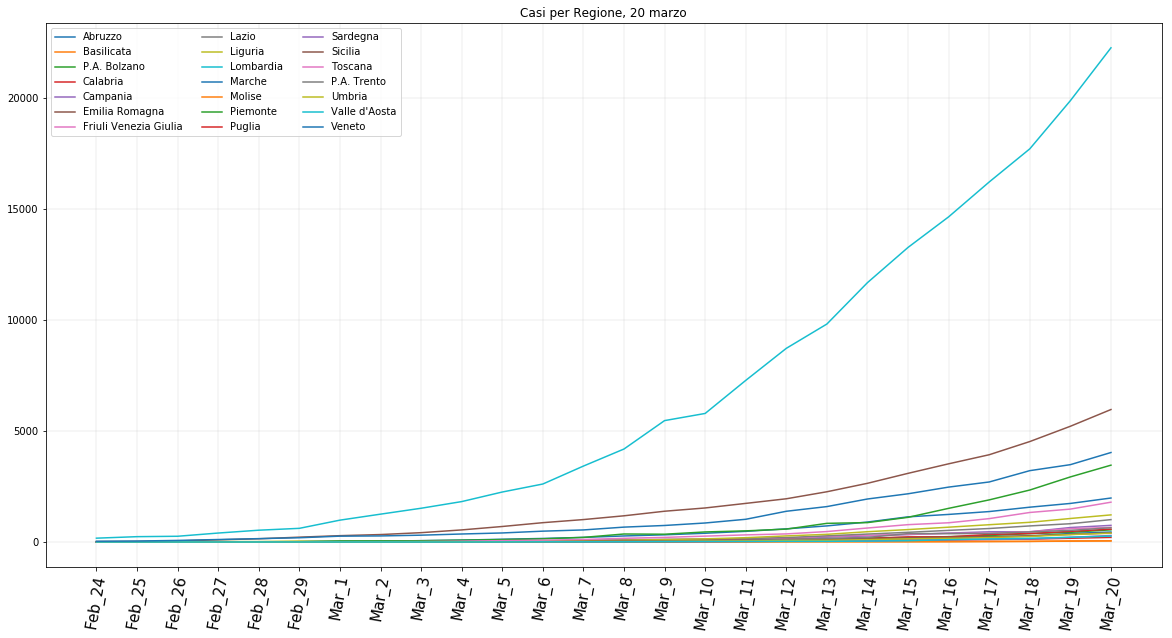

In [10]:
stat_type='totale_casi'
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation=80, size=15)
#plt.ylim(0,4000)
plt.grid(linewidth=0.2)
plt.title('Casi per Regione, %s marzo' %current_day)
_=plt.plot(reg_trend(stat_type))
_=plt.legend(reg_trend(stat_type).columns.values, loc='upper left',ncol=3)
plt.show()
fig.savefig('casi.png')

### Analisi a livello nazionale

In [11]:
# Queste funzioni mostrano l'andamento di una determinata statistica a livello di regione o nazionale con il
# passare dei giorni

# Nazionale
def overall_trend(stat_type):
    lista=[]
    for day in dataframes:
        lista.append(sum(dataframes[day][stat_type]))
    return lista

# Regionale
def overall_reg_trend(stat_type, region):
    lista=[]
    for day in dataframes:
        lista.append(int(dataframes[day][dataframes[day].denominazione_regione==region][stat_type].values))
    return lista

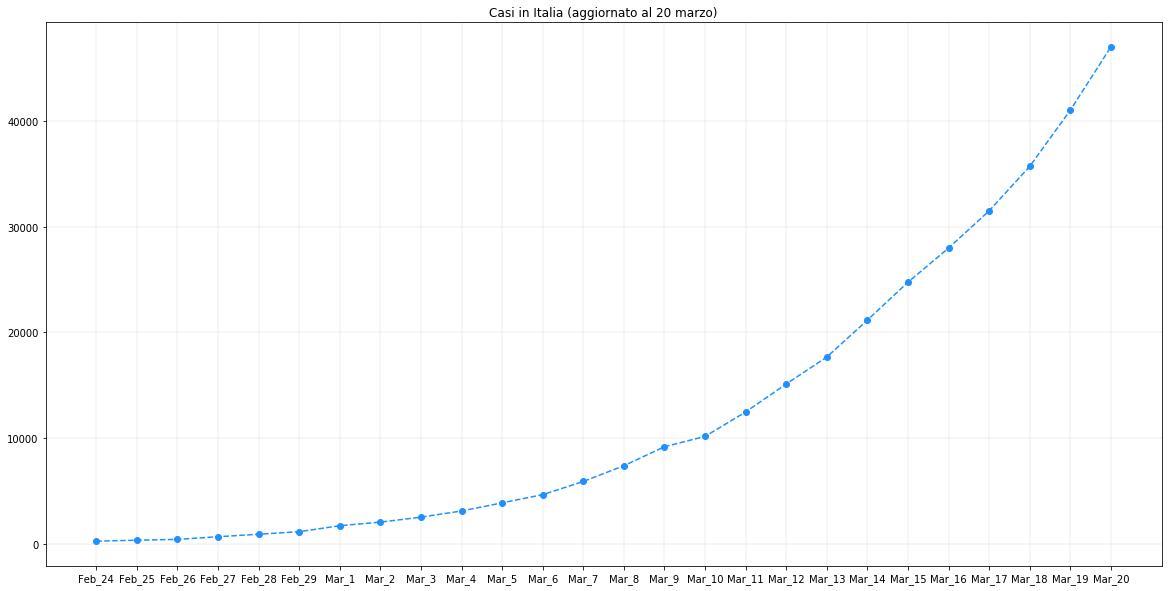

In [12]:
# Andamento nazionale della statistica desiderata

def print_overall_trend(stat_type, _color, scale='linear', region="Italy"):
    fig=plt.figure(figsize=(20,10))
    plt.grid(linewidth=0.2)
    plt.yscale(scale)
    plt.title('Casi in Italia (aggiornato al %d marzo)' %current_day)
    if region=="Italy":
        _=plt.plot(pd.DataFrame(overall_trend(stat_type)).rename(index=pd.Series([x for x in dataframes])), 'go--',color=_color)
        fig.savefig('fig.png')
    else:
        _=plt.plot(pd.DataFrame(overall_reg_trend(stat_type, region)).rename(index=pd.Series([x for x in dataframes])), 'go--',color=_color)
        fig.savefig('fig.png')
        
print_overall_trend('totale_casi', 'dodgerblue', scale='linear')

In [13]:
def delta_var(stat_type, perc="yes"):
    delta_perc=[]
    for i in range(len(list(overall_trend(stat_type)))):
        if i==0:
            pass
        else:
            if perc=="yes":
                delta=(list(overall_trend(stat_type))[i]-list(overall_trend(stat_type))[i-1])/list(overall_trend(stat_type))[i-1]
            else:
                delta=list(overall_trend(stat_type))[i]-list(overall_trend(stat_type))[i-1]
            delta_perc.append(delta)
    return delta_perc

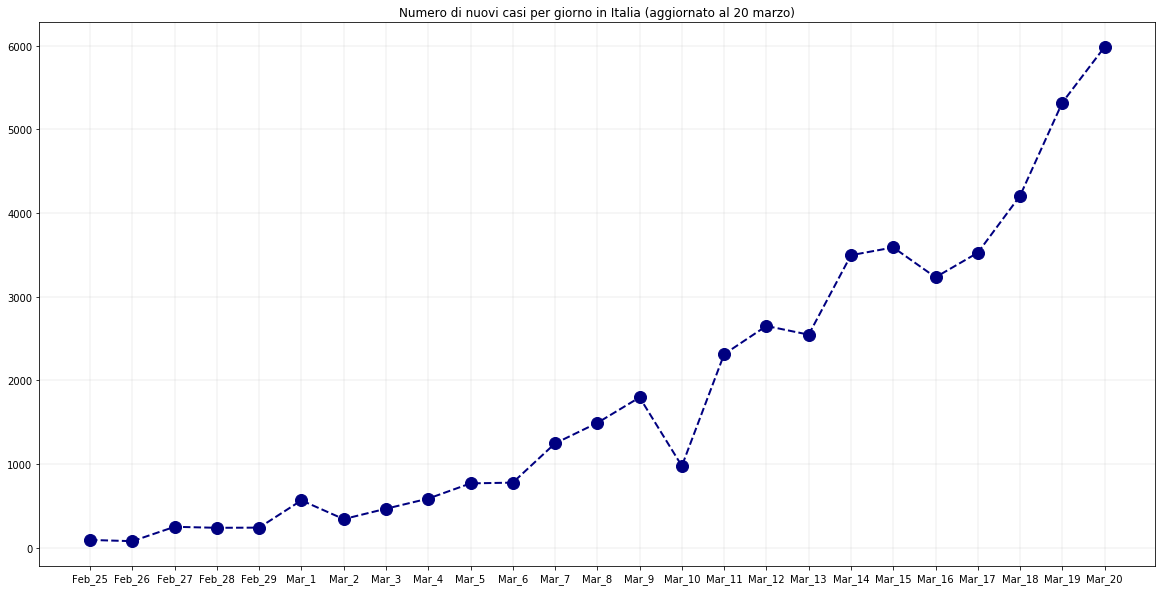

In [14]:
fig=plt.figure(figsize=(20,10))
plt.grid(linewidth=0.2)
plt.yscale('linear')
plt.title('Numero di nuovi casi per giorno in Italia (aggiornato al %d marzo)' %current_day)
index_=pd.Series([x for x in dataframes][1:])
_=plt.plot(pd.DataFrame(delta_var('totale_casi','no')).rename(index=index_),'go--', linewidth=2, markersize=12, color="navy")
fig.savefig('new.png')

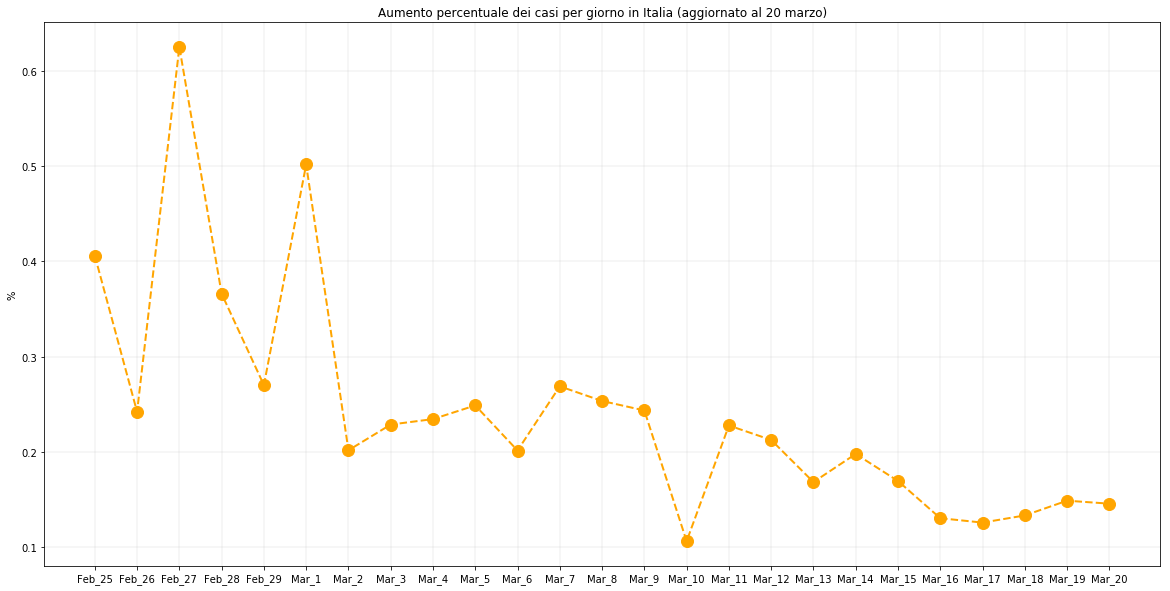

In [15]:
plt.figure(figsize=(20,10))
plt.grid(linewidth=0.2)
plt.yscale('linear')
plt.ylabel('%')
plt.title('Aumento percentuale dei casi per giorno in Italia (aggiornato al %d marzo)' %current_day)
index_=pd.Series([x for x in dataframes][1:])
_=plt.plot(pd.DataFrame(delta_var('totale_casi',)).rename(index=index_),'go--', linewidth=2, markersize=12, color="orange")

In [16]:
dataframes['Mar_20']

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-03-20 17:00:00,ITA,13,Abruzzo,42.351222,13.398438,190,48,238,184,422,56,10,17,449,2695
1,2020-03-20 17:00:00,ITA,17,Basilicata,40.639471,15.805148,8,5,13,39,52,15,0,0,52,443
2,2020-03-20 17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,99,24,123,407,530,109,1,17,548,4433
3,2020-03-20 17:00:00,ITA,18,Calabria,38.905976,16.594402,71,16,87,114,201,37,2,4,207,2690
4,2020-03-20 17:00:00,ITA,15,Campania,40.839566,14.250850,130,41,171,531,702,97,30,17,749,3845
5,2020-03-20 17:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,2083,267,2350,2739,5089,583,239,640,5968,20753
6,2020-03-20 17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,143,32,175,380,555,33,63,38,656,4964
7,2020-03-20 17:00:00,ITA,12,Lazio,41.892770,12.483667,537,47,584,328,912,171,53,43,1008,13889
8,2020-03-20 17:00:00,ITA,7,Liguria,44.411493,8.932699,573,121,694,307,1001,118,101,119,1221,3794
9,2020-03-20 17:00:00,ITA,3,Lombardia,45.466794,9.190347,7735,1050,8785,6635,15420,1482,4295,2549,22264,57174


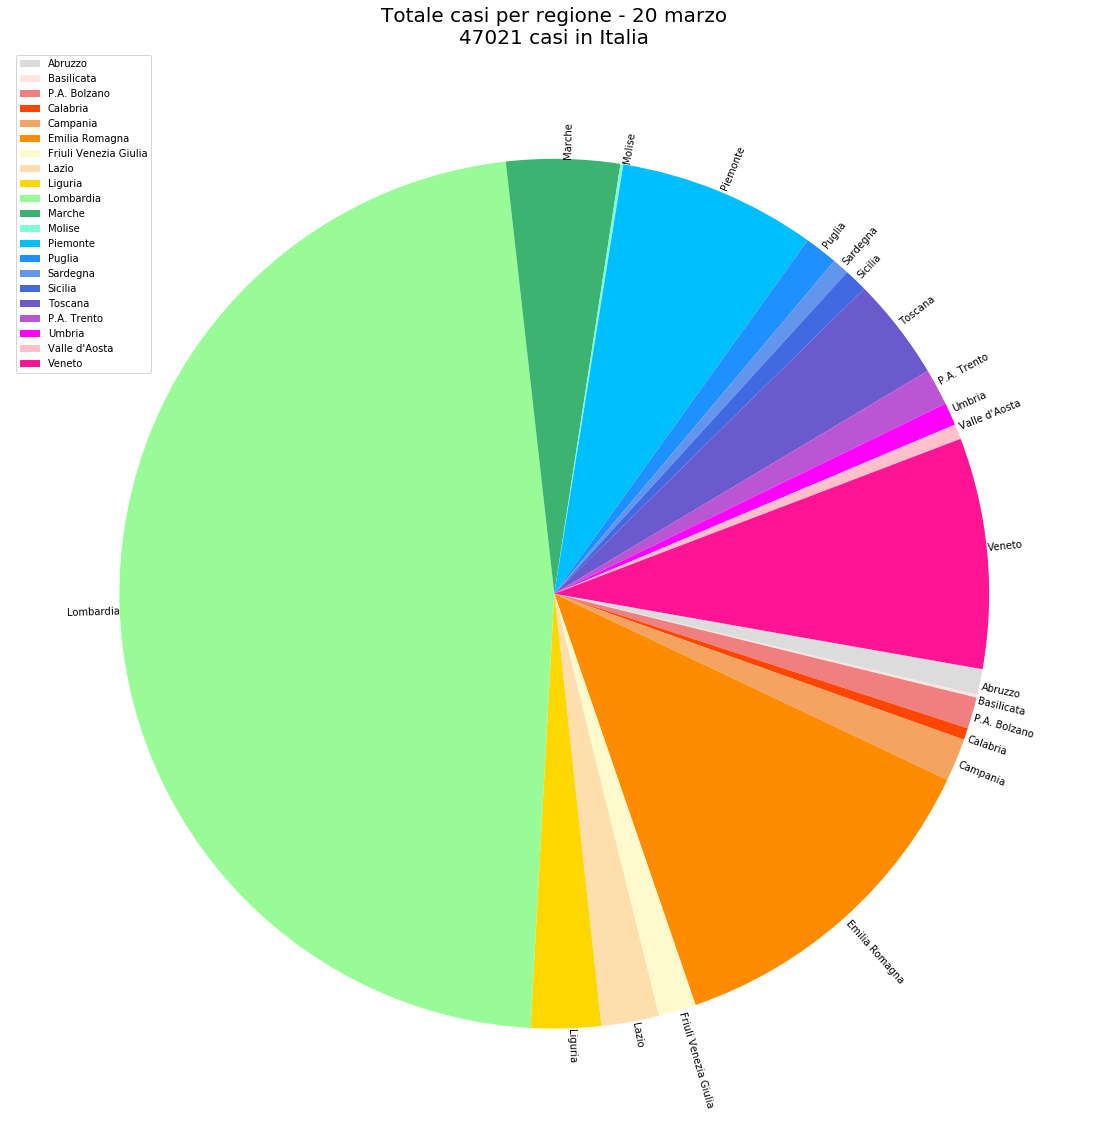

In [30]:

color_list = ['gainsboro','mistyrose','lightcoral','orangered','sandybrown','darkorange','lemonchiffon','navajowhite','gold',
             'palegreen', 'mediumseagreen','aquamarine','deepskyblue','dodgerblue','cornflowerblue','royalblue','slateblue',
             'mediumorchid','magenta', 'pink','deeppink']
fig=plt.figure(figsize=(30,20))
plt.title("Totale casi per regione - {} marzo\n{} casi in Italia".format(current_day, sum(dataframes['Mar_20'].totale_casi)) , fontsize=20)
_=plt.pie(dataframes['Mar_'+str(current_day)].totale_casi, labels=dataframes['Mar_'+str(current_day)].denominazione_regione,
          colors = color_list, labeldistance=1,rotatelabels=2, counterclock=False, startangle=-10)
plt.legend(dataframes['Mar_'+str(current_day)].denominazione_regione, loc=2)
plt.show()
fig.savefig('plot.png')

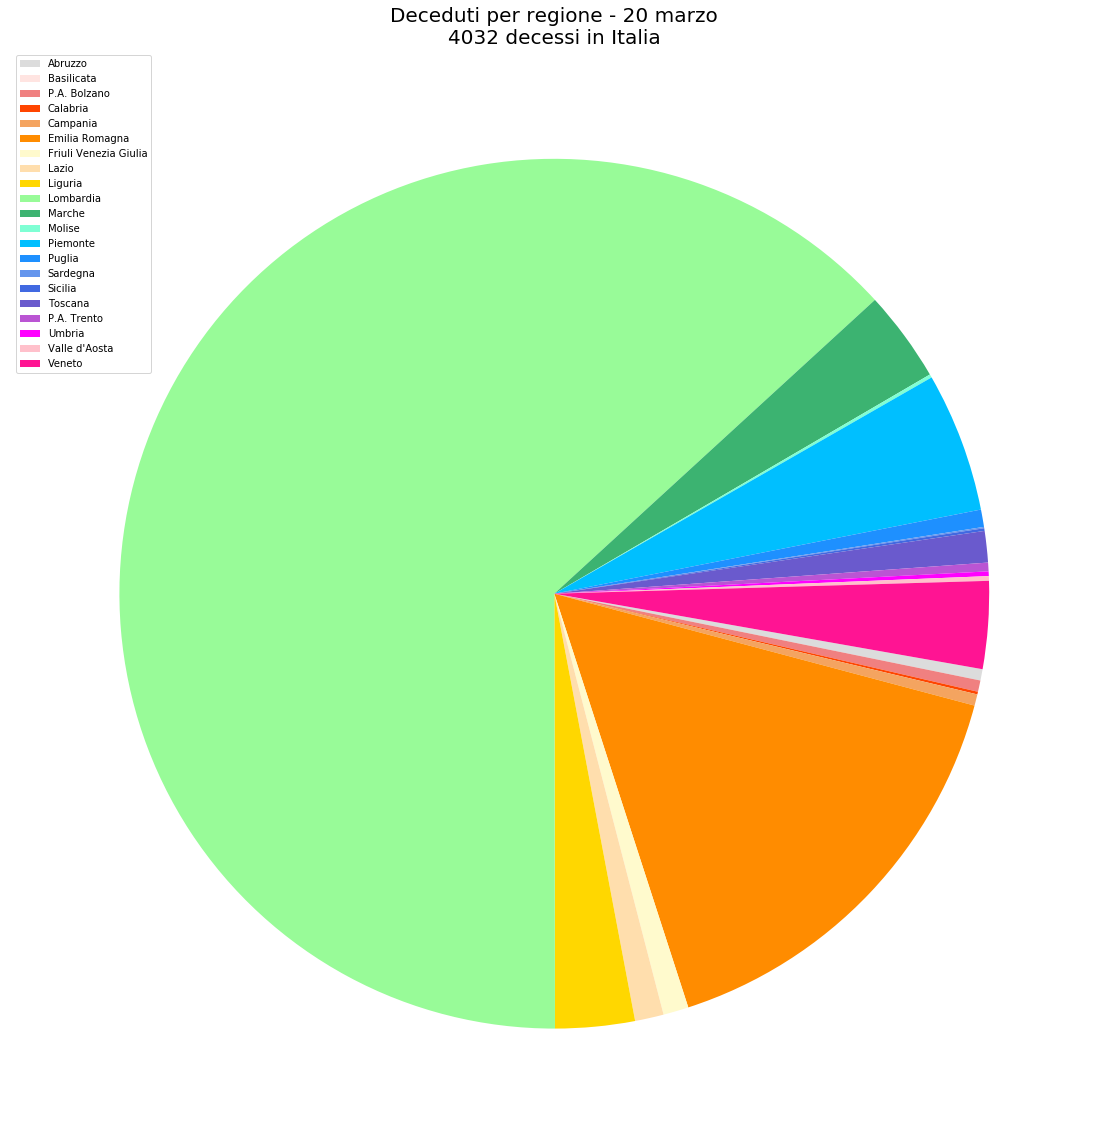

In [31]:
fig=plt.figure(figsize=(30,20))
plt.title("Deceduti per regione - {} marzo\n{} decessi in Italia".format(current_day, sum(dataframes['Mar_20'].deceduti)), fontsize=20)
_=plt.pie(dataframes['Mar_'+str(current_day)].deceduti,
          colors = color_list, counterclock=False, startangle=-10)
plt.legend(dataframes['Mar_'+str(current_day)].denominazione_regione, loc=2)
plt.show()
fig.savefig('pie2.png')

In [32]:
overall_trend('deceduti')

[7,
 10,
 12,
 17,
 21,
 29,
 34,
 52,
 79,
 107,
 148,
 197,
 233,
 366,
 463,
 631,
 827,
 1016,
 1266,
 1441,
 1809,
 2158,
 2503,
 2978,
 3405,
 4032]

In [33]:
4032-3405

627